# Here we use bagging classifier, extra tree classifier, voting classifier and random forest classifier on census data

### Loading the needed libraries

In [1]:
### Loading the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\lglv\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# Loading Data

In [3]:
url = 'https://raw.githubusercontent.com/LGLV/ML_Census-Income/main/CensusIncome.scv'

In [4]:
data = pd.read_csv(url)
data

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,6,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,32552,43,3,84661,8,11,2,11,0,4,1,0,0,45,38,0
24416,32553,32,3,116138,12,14,4,12,1,1,1,0,0,11,35,0
24417,32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
24418,32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24420.0,16306.316503,9376.263408,0.0,8196.75,16327.5,24419.25,32559.0
age,24420.0,39.123669,13.759997,17.0,28.00,38.0,48.00,90.0
workclass,24420.0,3.102334,1.109790,0.0,3.00,3.0,3.00,7.0
fnlwgt,24420.0,143041.703153,57259.295327,12285.0,103323.00,152087.5,189803.75,237044.0
education,24420.0,10.357740,3.806355,0.0,9.00,11.0,12.00,15.0
education-num,24420.0,10.140377,2.528812,1.0,9.00,10.0,13.00,16.0
marital-status,24420.0,2.588943,1.513468,0.0,2.00,2.0,4.00,6.0
occupation,24420.0,6.124816,3.964974,0.0,3.00,6.0,9.00,13.0
relationship,24420.0,1.448608,1.617486,0.0,0.00,1.0,3.00,5.0
race,24420.0,3.682310,0.847989,0.0,4.00,4.0,4.00,4.0


# Splitting in X and y variables

In [39]:
X = data.iloc[:,1:-1]
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,49,3,160187,6,5,3,7,1,2,0,0,0,16,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,43,3,84661,8,11,2,11,0,4,1,0,0,45,38
24416,32,3,116138,12,14,4,12,1,1,1,0,0,11,35
24417,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
24418,58,3,151910,11,9,6,0,4,4,0,0,0,40,38


In [40]:
y = data.income
y

0        0
1        0
2        0
3        0
4        0
        ..
24415    0
24416    0
24417    1
24418    0
24419    0
Name: income, Length: 24420, dtype: int64

# Spliting data in train and test sets

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('The shape of X train is:', X_train.shape)
print('The shape of y train is:', y_train.shape)
print('The shape of X test is:', X_test.shape)
print('The shape of y test is:', y_test.shape)

The shape of X train is: (16361, 14)
The shape of y train is: (16361,)
The shape of X test is: (8059, 14)
The shape of y test is: (8059,)


# Feature scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
X_train_esc = scaler.fit_transform(X_train)

In [44]:
X_test_esc = scaler.transform(X_test)

# Training 4 classification models

In [45]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, VotingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from mlxtend.plotting import plot_confusion_matrix

In [49]:
# lets create a Predictive Models

model_accuracy = pd.DataFrame(columns=['Model'])
models = {
    "BAGC" : BaggingClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "RFC" : RandomForestClassifier(),
    "VC" : VotingClassifier([('BAGC', BaggingClassifier()), ('ETC', ExtraTreesClassifier()), ('RFC', RandomForestClassifier())])
    }

for abrev, model in models.items():
    
    model.fit(X_train_esc, y_train)
    
    # score = model.score(X_train_esc, y_train) # Training score
        
    y_pred = model.predict(X_test_esc)
    
    acc = accuracy_score(y_test,y_pred)
    train_pred = model.predict(X_train_esc)
    train_acc = accuracy_score(y_train, train_pred)
    print("\n", abrev + ' scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('*' * 100,"\n")
    model_accuracy = model_accuracy.append({'Model': abrev, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)
    


 BAGC scores
0.8378210696116144
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6030
           1       0.73      0.56      0.63      2029

    accuracy                           0.84      8059
   macro avg       0.80      0.75      0.77      8059
weighted avg       0.83      0.84      0.83      8059

[[5616  414]
 [ 893 1136]]
**************************************************************************************************** 


 ETC scores
0.8404268519667453
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6030
           1       0.72      0.59      0.65      2029

    accuracy                           0.84      8059
   macro avg       0.80      0.76      0.77      8059
weighted avg       0.83      0.84      0.83      8059

[[5572  458]
 [ 828 1201]]
**************************************************************************************************** 


 RFC scores
0.848492

In [50]:
model_accuracy.sort_values(ascending=False, by = 'Accuracy')

,Model,Accuracy,Train_acc
2,RFC,0.848492,1.000000
3,VC,0.846383,1.000000
1,ETC,0.840427,1.000000
0,BAGC,0.837821,0.985453


# Scaling all independent features before train test split

In [51]:
std_scal = StandardScaler()

In [52]:
X_scaled = std_scal.fit_transform(X)
X_scaled

array([[-0.00898777,  2.6110572 , -1.14439139, ..., -0.21852682,
        -0.03921413,  0.24140906],
       [ 0.79044741,  1.70996738, -1.04318305, ..., -0.21852682,
        -2.21194053,  0.24140906],
       [-0.08166369, -0.09221226,  1.26801741, ..., -0.21852682,
        -0.03921413,  0.24140906],
       ...,
       [ 0.06368816, -0.09221226,  0.19791597, ..., -0.21852682,
        -0.03921413,  0.24140906],
       [ 1.37185481, -0.09221226,  0.15488277, ..., -0.21852682,
        -0.03921413,  0.24140906],
       [-1.24447849, -0.09221226,  1.02078611, ..., -0.21852682,
        -1.64864109,  0.24140906]])

# Handling inmbalenced target
### Random Undersampling

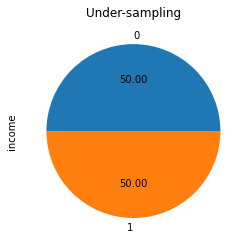

In [53]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_scaled, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [69]:
y_res.value_counts()

0    5991
1    5991
Name: income, dtype: int64

In [77]:
y.value_counts()

0    18429
1     5991
Name: income, dtype: int64

# Spliting data in train and test sets

In [70]:
from sklearn.model_selection import train_test_split
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_res, y_res, test_size = 0.20, random_state=42)
print('The X_train_us shape is:', X_train_us.shape)
print('The X_test_us shape is:', X_test_us.shape)
print('The y_train_us shape is:', y_train_us.shape)
print('The y_test_us shape is:', y_test_us.shape)

The X_train_us shape is: (9585, 14)
The X_test_us shape is: (2397, 14)
The y_train_us shape is: (9585,)
The y_test_us shape is: (2397,)


In [71]:
# lets create a Predictive Models

model_accuracy = pd.DataFrame(columns=['Model'])
models = {
    "BAGC" : BaggingClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "RFC" : RandomForestClassifier(),
    "VC" : VotingClassifier([('BAGC', BaggingClassifier()), ('ETC', ExtraTreesClassifier()), ('RFC', RandomForestClassifier())])
    }

for abrev, model in models.items():
    
    model.fit(X_train_us, y_train_us)
    
    # score = model.score(X_train_esc, y_train) # Training score
        
    y_pred_us = model.predict(X_test_us)
    
    acc = accuracy_score(y_test_us,y_pred_us)
    train_pred = model.predict(X_train_us)
    train_acc = accuracy_score(y_train_us, train_pred)
    print("\n", abrev + ' scores')
    print(acc)
    print(classification_report(y_test_us,y_pred_us))
    print(confusion_matrix(y_test_us,y_pred_us))
    print('*' * 100,"\n")
    model_accuracy = model_accuracy.append({'Model': abrev, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)


 BAGC scores
0.7901543596161869
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1227
           1       0.78      0.80      0.79      1170

    accuracy                           0.79      2397
   macro avg       0.79      0.79      0.79      2397
weighted avg       0.79      0.79      0.79      2397

[[962 265]
 [238 932]]
**************************************************************************************************** 


 ETC scores
0.799749687108886
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1227
           1       0.77      0.84      0.80      1170

    accuracy                           0.80      2397
   macro avg       0.80      0.80      0.80      2397
weighted avg       0.80      0.80      0.80      2397

[[936 291]
 [189 981]]
**************************************************************************************************** 


 RFC scores
0.799749687108886

In [72]:
model_accuracy.sort_values(ascending=False, by = 'Train_acc')

,Model,Accuracy,Train_acc
1,ETC,0.799750,1.000000
2,RFC,0.799750,1.000000
3,VC,0.803087,1.000000
0,BAGC,0.790154,0.986437


### Random Oversampling

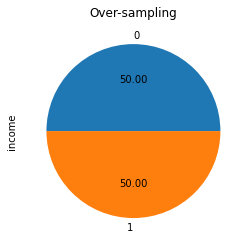

In [73]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res_over, y_res_over = ros.fit_resample(X_scaled, y)

ax = y_res_over.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [75]:
y_res_over.value_counts()

0    18429
1    18429
Name: income, dtype: int64

In [76]:
y.value_counts()

0    18429
1     5991
Name: income, dtype: int64

# Spliting data in train and test sets

In [78]:
X_train_overs, X_test_overs, y_train_overs, y_test_overs = train_test_split(X_res_over, y_res_over, test_size = 0.2, random_state=42)
print('The X_train_overs shape is:', X_train_overs.shape)
print('The X_test_overs shape is:', X_test_overs.shape)
print('The y_train_overs shape is:', y_train_overs.shape)
print('The y_test_overs shape is:', y_test_overs.shape)

The X_train_overs shape is: (29486, 14)
The X_test_overs shape is: (7372, 14)
The y_train_overs shape is: (29486,)
The y_test_overs shape is: (7372,)


In [89]:
# lets create a Predictive Models

model_accuracy = pd.DataFrame(columns=['Model'])
models = {
    "BAGC" : BaggingClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "RFC" : RandomForestClassifier(),
    "VC" : VotingClassifier([('BAGC', BaggingClassifier()), ('ETC', ExtraTreesClassifier()), ('RFC', RandomForestClassifier())])
    }

for abrev, model in models.items():
    
    model.fit(X_train_overs, y_train_overs)
    
    # score = model.score(X_train_esc, y_train) # Training score
        
    y_pred_overs = model.predict(X_test_overs)
    
    acc = accuracy_score(y_test_overs, y_pred_overs)
    train_pred_overs = model.predict(X_train_overs)
    train_acc_overs = accuracy_score(y_train_overs, train_pred_overs)
    print("\n", abrev + ' scores')
    print(acc)
    print(classification_report(y_test_overs, y_pred_overs))
    print(confusion_matrix(y_test_overs, y_pred_overs))
    print('*' * 100,"\n")
    model_accuracy = model_accuracy.append({'Model': abrev, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)


 BAGC scores
0.9183396635919696
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3640
           1       0.89      0.95      0.92      3732

    accuracy                           0.92      7372
   macro avg       0.92      0.92      0.92      7372
weighted avg       0.92      0.92      0.92      7372

[[3209  431]
 [ 171 3561]]
**************************************************************************************************** 


 ETC scores
0.9305480195333695
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3640
           1       0.91      0.96      0.93      3732

    accuracy                           0.93      7372
   macro avg       0.93      0.93      0.93      7372
weighted avg       0.93      0.93      0.93      7372

[[3274  366]
 [ 146 3586]]
**************************************************************************************************** 


 RFC scores
0.924579

In [90]:
model_accuracy.sort_values(ascending=False, by = 'Train_acc')

,Model,Accuracy,Train_acc
0,BAGC,0.918340,1.0
1,ETC,0.930548,1.0
2,RFC,0.924579,1.0
3,VC,0.927699,1.0


# Conclusions 

Comparing the models between Undersampling, Oversampling and inmbalenced data. 

* Oversamplig example, ovefits in all the models tested.

Between the Undersampling and inmbalenced data models:
* In Undersampling data models the one that did not ovefits was BaggingClassifier with:    
    Accuracy of: 0.790154    
    Training accuracy of: 0.986437 
    
    
* In inmbalenced data models the one that did not ovefits was BaggingClassifier with:  
    Accuracy of: 0.837821 	 
    Training accuracy of: 0.985453

### Thus, we recomend to use the inmbalenced data to make predictions of census data.
 